nitin tomar \\

24m1079

In [ ]:
!pip install scikit-learn torch torchvision

Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

import torch
import torchvision.models as models

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

100%|██████████| 142k/142k [00:00<00:00, 43.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1


Reading the datasets

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/bank.csv')
display(df.head())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **EDA**

Fatures description

1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual


9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


Output variable (desired target):
21 - Deposits (Y) - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None

descriptive statistics

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Plotting Histogram for numerical features

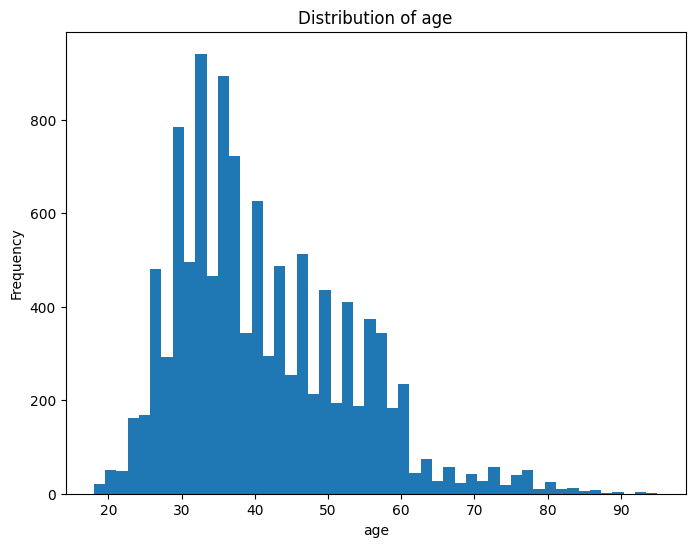

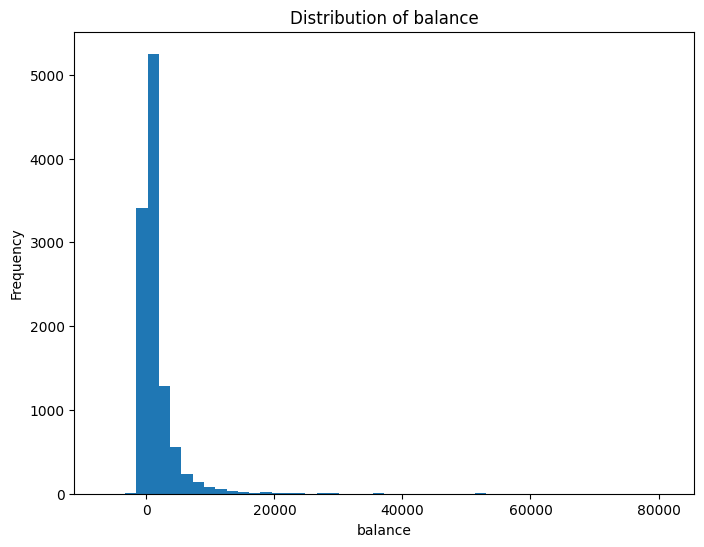

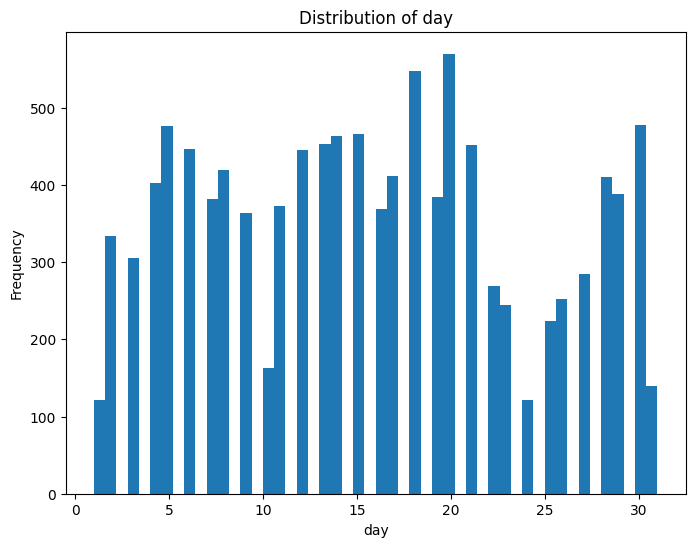

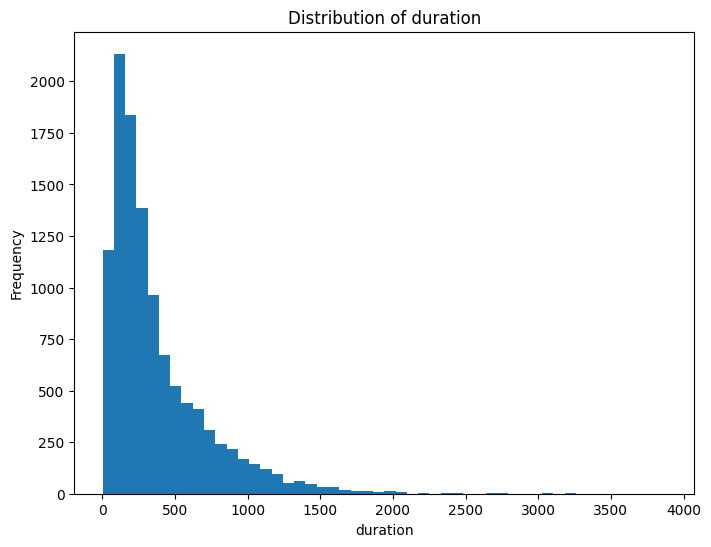

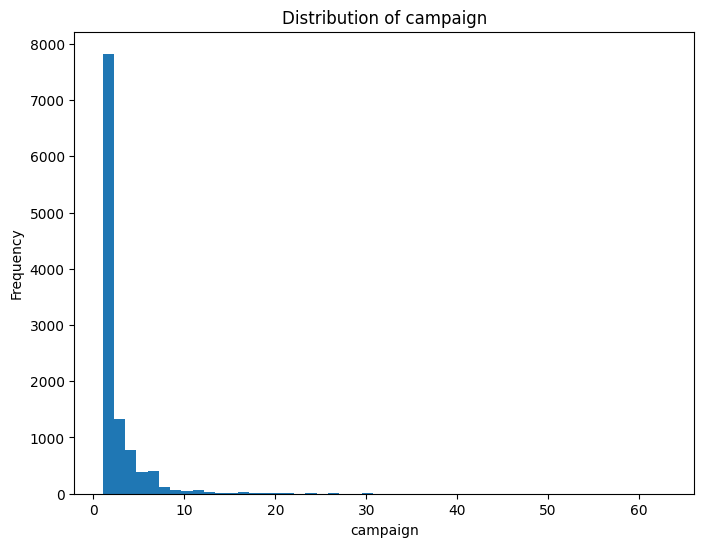

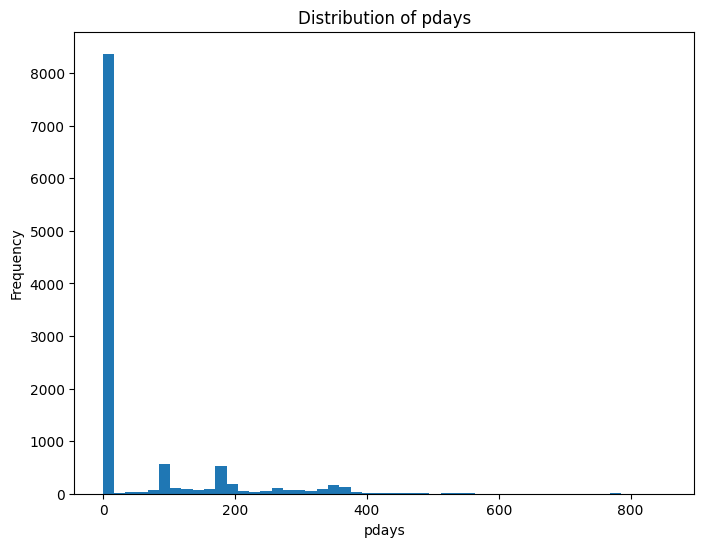

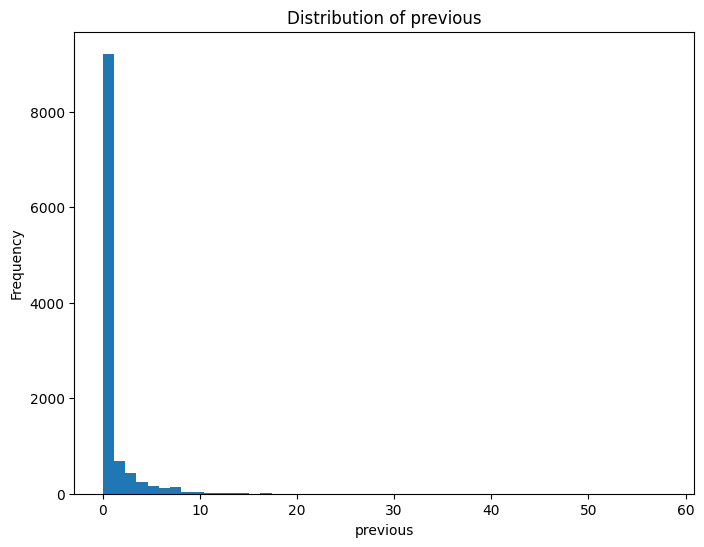

In [ ]:
# Plotting histograms for all numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature], bins=50)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {feature}')
  plt.show()

Plotting Bar chart for categorical variables

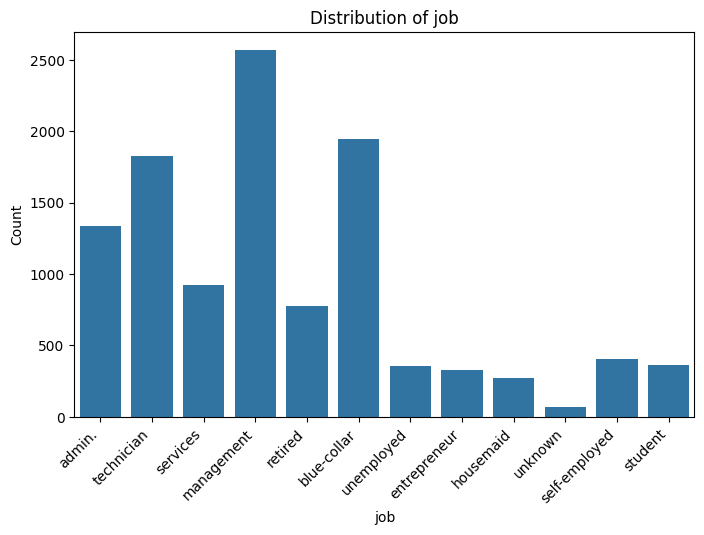

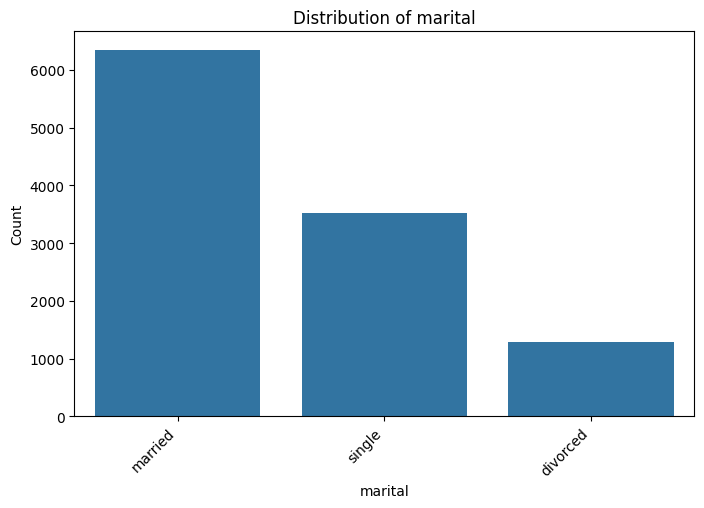

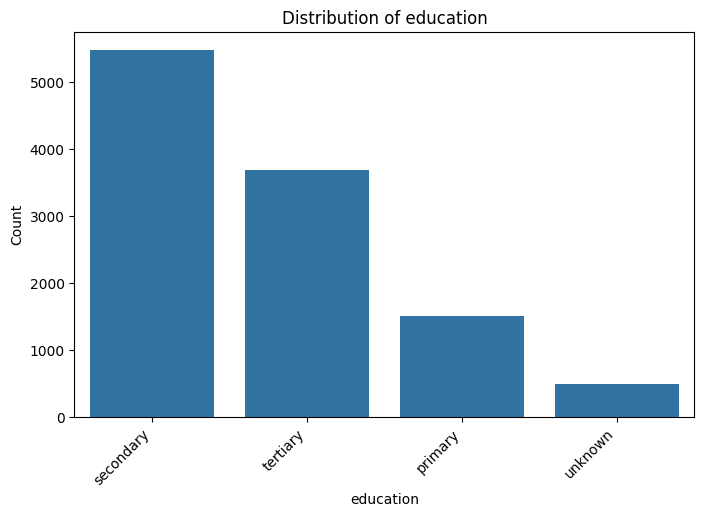

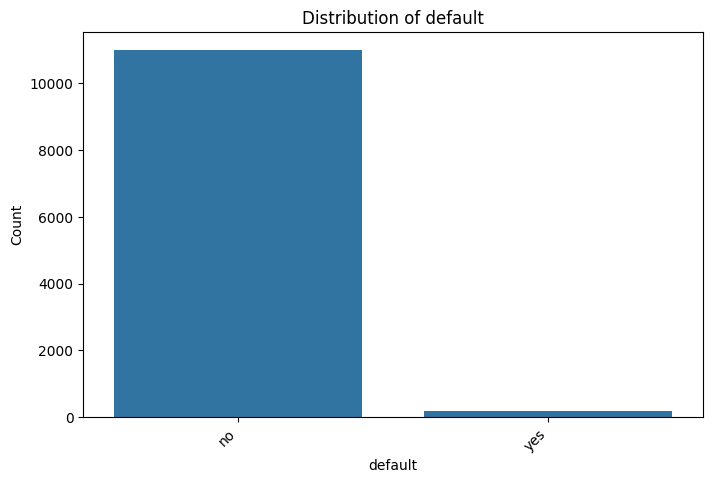

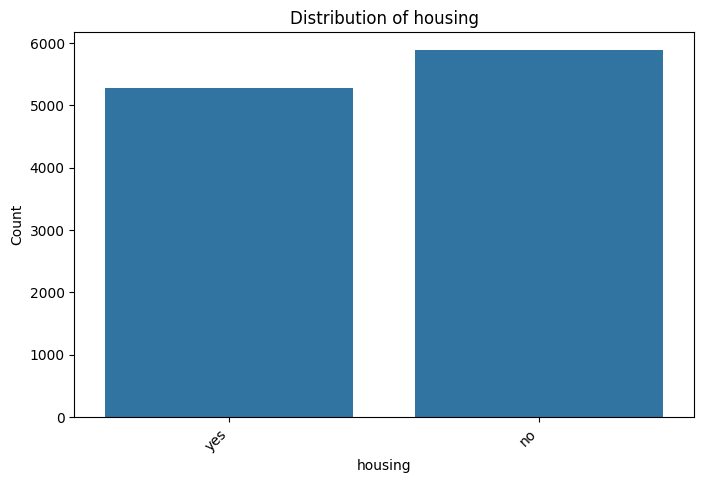

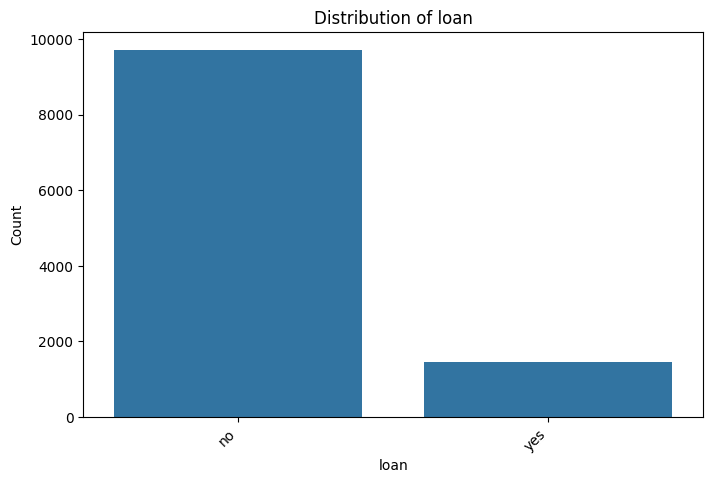

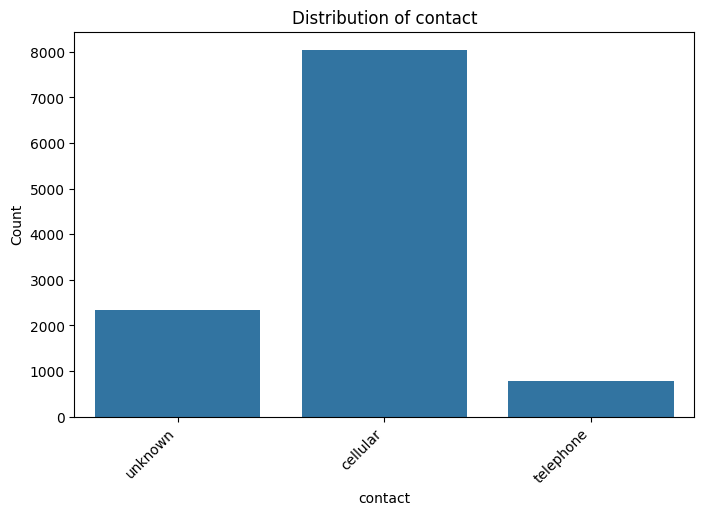

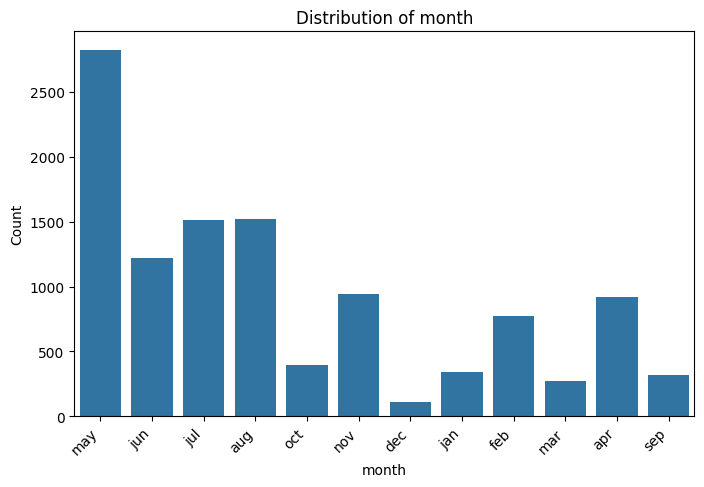

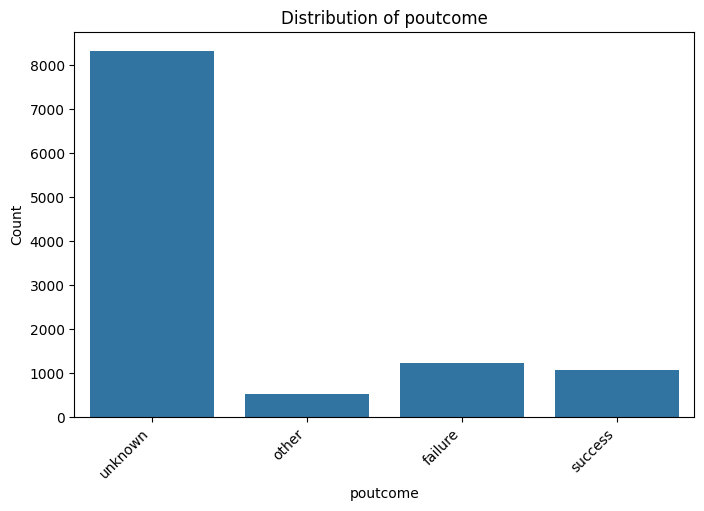

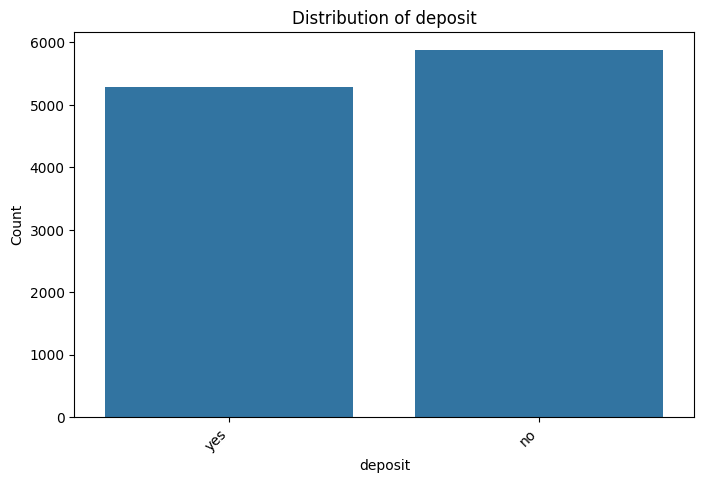

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=feature, data=df)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation=45, ha='right')
  plt.show()

plotting Heatmap

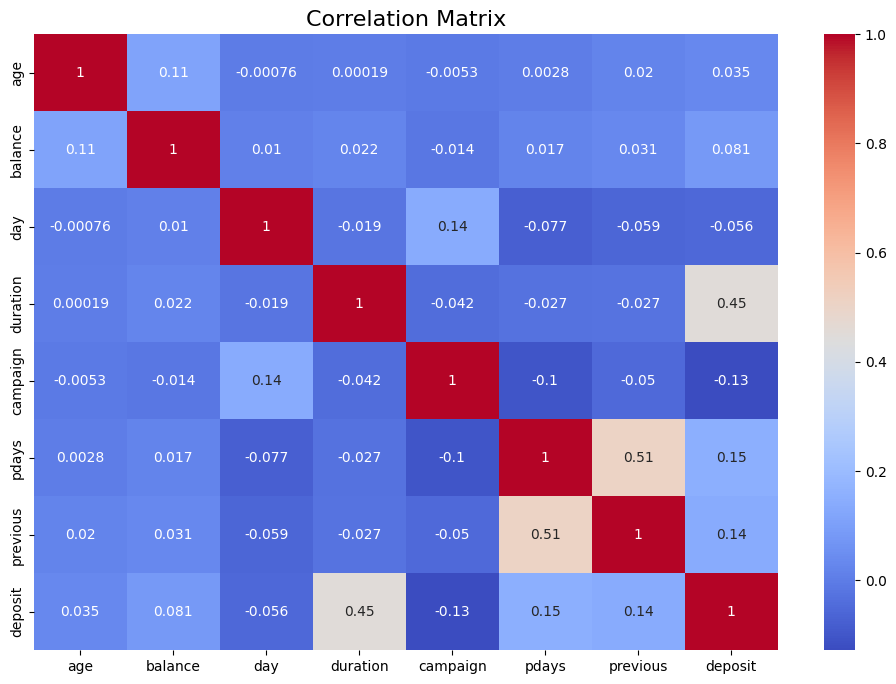

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True,annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=16)
plt.show()


# **1**

1.(a) All variable are useful except some have very less correlation with the output label like age(very weak correlation 0.035) and days (very weak negative correlation -0.056) so can remove these features.

1.(b)
 Duration Features highly affects the output target, if duration=0 then output='no'. as its have highest correlation with the target variable. also previous and pdays features have high correlation its useful to remove one of the feature among two as it will not have much influence on output.**bold text**

In [ ]:
# Prepare data for bar chart
poutcome_counts = df.poutcome.value_counts().reset_index()
poutcome_counts.columns = ['Poutcome', 'Count']  # Renaming columns

# Bar chart
bar_fig = px.bar(
    poutcome_counts,
    x='Poutcome',
    y='Count',
    color='Poutcome',
    text='Count',
    color_discrete_sequence=['grey', 'red', 'green', 'blue'],
    template='simple_white'
)
bar_fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
bar_fig.update_layout(
    title_x=0.5,
    title_text='<b>Outcome of Previous Marketing Campaign',
    font_family="Times New Roman",
    title_font_family="Times New Roman"
)
bar_fig.show()

# Prepare data for pie chart
pie_fig = px.pie(
    poutcome_counts,
    names='Poutcome',
    values='Count',
    hole=0.5,
    template='simple_white',
    color_discrete_sequence=['grey', 'red', 'blue', 'green']
)
pie_fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
pie_fig.update_layout(
    title_x=0.5,
    showlegend=True,
    legend_title_text='<b>Poutcome',
    title_text='<b>Outcome of Previous Marketing Campaign',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    legend=dict(orientation='v', yanchor='middle', y=1.02, xanchor='right', x=1)
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()


**1(c) classes are not balanced in poutcome. From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 74.6% and Failure ~ 11%
Success rate is very less ~ 9.6 and others ~ 4.81%.bold text**

1(d)
**From the Analysis, on doing Marketing Campaigns there will be more Failure than Success**

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


# 2. I have selected following metrics to know my model performance
(i) Accuracy - To know overall correctness ((Tp+Tn)/(tp+tn+fp+fn))

(ii) F1 Score - Balance precision and recall

(iii) AUC - ROC - Evaluate models ability to distinguish between classes

(iv) Precision - Proportion of true positive among all positive prediction

(v) Recall - Proportion of true positives among all actual positive instances

# To abtain this metrics i will use Classification Report.

3.
(a)# Justification
Using a Standard Scaler to normalize continuous variables is essential, especially when models are sensitive to the scale of input features, such as in logistic regression or SVM. Standard Scaler transforms features to have a mean of 0 and standard deviation of 1, aligning them to a standard Gaussian distribution. This approach is beneficial when features have different units or ranges, preventing any single feature from disproportionately influencing the model. Moreover, standardization enhances convergence rates in gradient-based algorithms, improving model training efficiency and ensuring more stable and reliable results across models that rely on distance-based calculations.**bold text**


(b) I am using all values of discrete variables as it retains detailed information, allowing the model to capture nuanced relationships. However, this approach may lead to increased complexity and overfitting, especially with high cardinality variables. Careful feature selection and dimensionality reduction techniques can help manage these challenges effectively

(c) Yes some variable are noisy for that i have removed all the outliers from that features so that outliers dont fit in my model training.

## 4.

In [ ]:

# Define the numerical and categorical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Define the preprocessing steps for numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Combine both pipelines using ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Split data into training and testing sets
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)

# Transform X_test using the already fitted pipeline
X_test_transformed = preprocessing_pipeline.transform(X_test)




## 5
c.

In [ ]:
# Define the final pipeline with a classifier (RandomForest as an example)
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Train the model using cross-validation
pipeline.fit(X_train, y_train)

# Evaluate the model
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())

# Test set evaluation
test_score = pipeline.score(X_test, y_test)
print("Test set accuracy:", test_score)

Cross-validation accuracy scores: [0.8600224  0.85218365 0.85834267 0.85778275 0.85490196]
Mean cross-validation accuracy: 0.8566466855499199
Test set accuracy: 0.8414688759516346


Cross-validation accuracy scores: [0.8600224  0.85218365 0.85834267 0.85778275 0.85490196]
Mean cross-validation accuracy: 0.8566466855499199
Test set accuracy: 0.8414688759516346

# **5**

In [ ]:
# Define parameter grids
svm_param_grid = {'classifier__C': [0.1, 1, 10], 'classifier__gamma': [0.1, 0.01, 0.001]} # Updated parameter names
nn_param_grid = {'classifier__hidden_layer_sizes': [(50,), (100,)], 'classifier__alpha': [0.001, 0.01]} # Updated parameter names
rf_param_grid = {'classifier__max_depth': [5, 10, None], 'classifier__max_features': [5, 'sqrt']} # Updated parameter names

# Initialize and fit models with GridSearchCV
# Apply preprocessing pipeline within GridSearchCV for all models
models = {
    'SVM': GridSearchCV(Pipeline([('preprocessing', preprocessing_pipeline), ('classifier', SVC(kernel='rbf'))]), svm_param_grid, cv=5, scoring='f1'),
    'NN': GridSearchCV(Pipeline([('preprocessing', preprocessing_pipeline), ('classifier', MLPClassifier(activation='relu', max_iter=500))]), nn_param_grid, cv=5, scoring='f1'),
    'RF': GridSearchCV(Pipeline([('preprocessing', preprocessing_pipeline), ('classifier', RandomForestClassifier())]), rf_param_grid, cv=5, scoring='f1')
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} Best Params: {model.best_params_}")
    print(f"{model_name} Best Score: {model.best_score_}")

SVM Best Params: {'classifier__C': 1, 'classifier__gamma': 0.1}
SVM Best Score: 0.8510209999809749


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum

NN Best Params: {'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (50,)}
NN Best Score: 0.825682823734363
RF Best Params: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt'}
RF Best Score: 0.8536505335000951


SVM Best Params: {'classifier__C': 1, 'classifier__gamma': 0.1}
SVM Best Score: 0.8510209999809749

NN Best Params: {'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (50,)}
NN Best Score: 0.825682823734363

RF Best Params: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt'}
RF Best Score: 0.8536505335000951

# 6

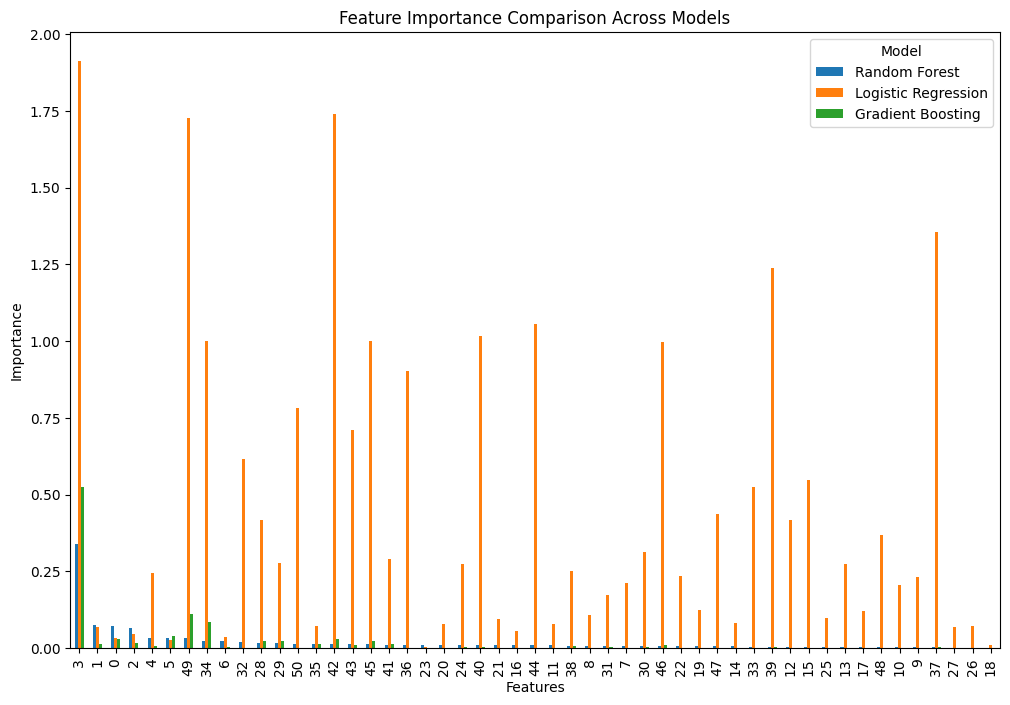

    Random Forest  Logistic Regression  Gradient Boosting
3        0.339627             1.911389           0.524287
1        0.073895             0.069211           0.013090
0        0.070385             0.033427           0.029732
2        0.063991             0.046755           0.017095
4        0.033734             0.245639           0.006989
5        0.031082             0.026950           0.037767
49       0.030876             1.726945           0.110916
34       0.022163             0.999213           0.084201
6        0.022092             0.035937           0.002606
32       0.018098             0.614394           0.001320
28       0.016207             0.417700           0.022186
29       0.014675             0.277670           0.023334
50       0.013851             0.780229           0.000663
35       0.013592             0.070188           0.012998
42       0.012881             1.740093           0.030292
43       0.012090             0.710443           0.009460
45       0.011

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Fit models and calculate feature importance
feature_importances = {}

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    if hasattr(model, 'feature_importances_'):
        # Tree-based models (Random Forest, Gradient Boosting)
        feature_importances[name] = model.feature_importances_
    elif name == 'Logistic Regression':
        # Coefficients for linear models
        feature_importances[name] = np.abs(model.coef_[0])
    else:
        # Use SHAP for models without direct feature importance
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_test)
        feature_importances[name] = np.abs(shap_values.values).mean(axis=0)

# Compare feature importances
feature_importance_df = pd.DataFrame(feature_importances)
feature_importance_df.sort_values(by=list(feature_importance_df.columns), ascending=False, inplace=True)

# Plot feature importance comparison
feature_importance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Importance Comparison Across Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(title='Model')
plt.show()

# Display feature importance data
print(feature_importance_df)


# 7

7.

In [ ]:
# # Apply RFECV to each model and capture results
# optimal_features = {}
# for name, model in models.items():
#     rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
#     rfecv.fit(X_train, y_train)
#     optimal_features[name] = X_train.columns[rfecv.support_]

#     # Print the results for each model
#     print(f"Model: {name}")
#     print(f"Optimal number of features: {rfecv.n_features_}")
#     print(f"Selected features: {list(optimal_features[name])}")
#     print(f"Cross-validated accuracy: {rfecv.grid_scores_[rfecv.n_features_ - 1]:.4f}")
#     print("")

#     # Plot number of features vs. cross-validation scores
#     plt.figure()
#     plt.title(f"RFECV - {name}")
#     plt.xlabel("Number of Features Selected")
#     plt.ylabel("Cross-Validation Score (Accuracy)")
#     plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#     plt.show()

# # Fit final models using optimal features
# for name, model in models.items():
#     model.fit(X_train[optimal_features[name]], y_train)
#     y_pred = model.predict(X_test[optimal_features[name]])
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name} Accuracy with Optimal Features: {accuracy:.4f}")


# 8

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.87      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1166
           1       0.80      0.84      0.82      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      22

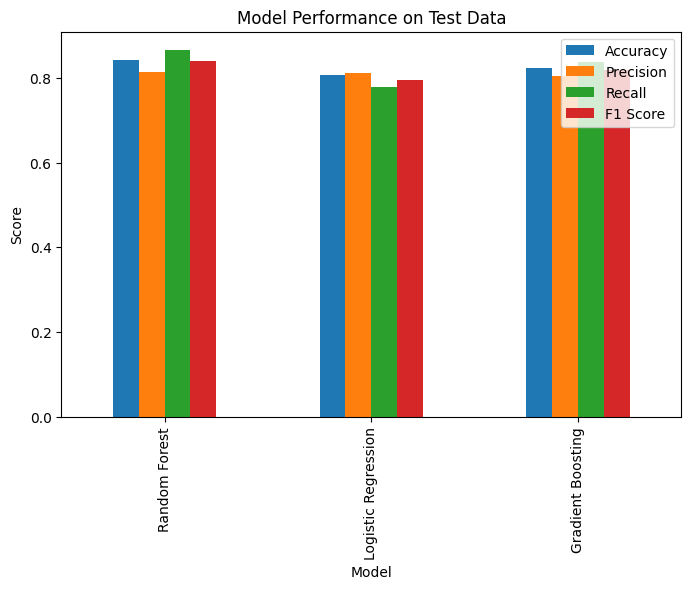

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# # Generate some sample data for demonstration (replace with your actual data)
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
# X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and evaluate the models on the test set using optimal features
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

performance_metrics = []

for name, model in models.items():
    # Fit the model on optimal features
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    performance_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    # Print classification report for each model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display and analyze model performance
performance_df = pd.DataFrame(performance_metrics)
print("Model Performance Comparison:")
print(performance_df)

# Visualize model performance metrics
performance_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(8, 5))
plt.title('Model Performance on Test Data')
plt.ylabel('Score')
plt.show()


# 9

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        86
           1       0.91      0.84      0.87        73

    accuracy                           0.89       159
   macro avg       0.89      0.88      0.89       159
weighted avg       0.89      0.89      0.89       159



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        86
           1       0.86      0.84      0.85        73

    accuracy                           0.86       159
   macro avg       0.86      0.86      0.86       159
weighted avg       0.86      0.86      0.86       159



Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        86
           1       0.93      0.85      0.89        73

    accuracy                           0.90       159
   macro avg       0.90      0.90      0.90       1

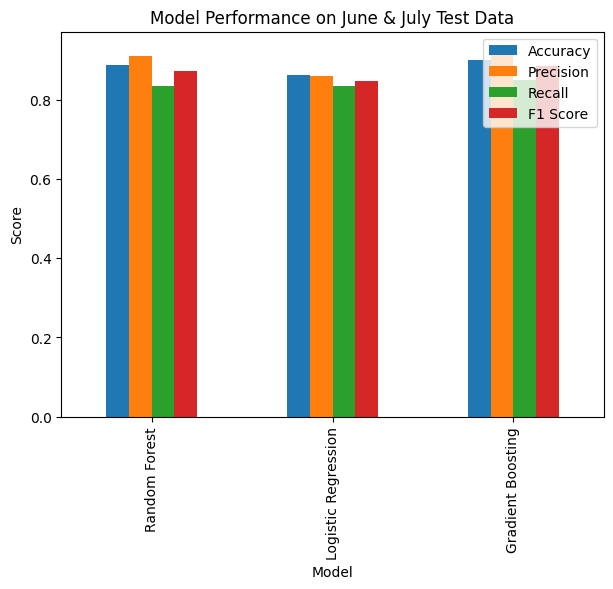

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Assuming your dataset has a 'month' column and a target column (e.g., 'target')
# Sample data generation for demonstration (replace this with your actual data)
np.random.seed(42)
n_samples = 1000
months = np.random.choice(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], n_samples)
X, y = make_classification(n_samples=n_samples, n_features=10, random_state=42)
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
data['month'] = months
data['target'] = y

# Split data based on months
train_data = data[~data['month'].isin(['June', 'July'])]  # Exclude June and July from training
test_data = data[data['month'].isin(['June', 'July'])]     # Use only June and July for testing

X_train = train_data.drop(['month', 'target'], axis=1)
y_train = train_data['target']
X_test = test_data.drop(['month', 'target'], axis=1)
y_test = test_data['target']

# Define models to test
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

performance_metrics = []

for name, model in models.items():
    # Fit the model on training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    performance_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    # Print classification report for each model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display and analyze model performance
performance_df = pd.DataFrame(performance_metrics)
print("Model Performance Comparison (June & July Testing):")
print(performance_df)

# Visualize model performance metrics
performance_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(7, 5))
plt.title('Model Performance on June & July Test Data')
plt.ylabel('Score')
plt.show()


# 10

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Load a pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)
for param in resnet18.parameters():
    param.requires_grad = False  # Freeze all layers

# Remove the last fully connected layer
feature_extractor = torch.nn.Sequential(*list(resnet18.children())[:-1])
feature_extractor.eval()  # Set to evaluation mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.



Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

# 11

In [ ]:
import urllib.request
import zipfile
import os

# Define the URL and download location
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
download_path = "hymenoptera_data.zip"

# Download the file
urllib.request.urlretrieve(url, download_path)

# Extract the file
with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall("hymenoptera_data")


In [ ]:
# # Define the directory with images
# data_dir = "hymenoptera_data/hymenoptera_data/train"

# # List all image paths in the directory
# image_paths = []
# for root, dirs, files in os.walk(data_dir):
#     for file in files:
#         if file.endswith(".jpg") or file.endswith(".png"):
#             image_paths.append(os.path.join(root, file))

# # Print out the image paths
# print("Image paths:", image_paths)


Image paths: ['hymenoptera_data/hymenoptera_data/train/ants/178538489_bec7649292.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/382971067_0bfd33afe0.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/424119020_6d57481dab.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/ant photos.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/kurokusa.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/245647475_9523dfd13e.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/trap-jaw-ant-insect-bg.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/149244013_c529578289.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/892108839_f1aad4ca46.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/82852639_52b7f7f5e3.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/649026570_e58656104b.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/318052216_84dff3f98a.jpg', 'hymenoptera_data/hymenoptera_data/train/ants/2288450226_

In [ ]:
import numpy as np
from tqdm import tqdm

# Define image transformations (resize, crop, and normalize)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset (replace 'path_to_data' with your actual dataset path)
image_datasets = {
    'train': ImageFolder(root='hymenoptera_data/hymenoptera_data/train', transform=transform), # Change to the extracted data folder
    'test': ImageFolder(root='hymenoptera_data/hymenoptera_data/val', transform=transform)
}
train_loader = DataLoader(image_datasets['train'], batch_size=32, shuffle=False)

# Function to extract features using ResNet18
def extract_resnet18_features(dataloader, model):
    features = []
    labels = []
    with torch.no_grad():  # Disable gradients for feature extraction
        for inputs, label in tqdm(dataloader):
            outputs = model(inputs)  # Pass through feature extractor
            outputs = outputs.view(outputs.size(0), -1)  # Flatten to (N, 512)
            features.append(outputs.cpu().numpy())
            labels.append(label.cpu().numpy())
    return np.vstack(features), np.hstack(labels)

# Extract features for the training dataset
train_features, train_labels = extract_resnet18_features(train_loader, feature_extractor)
print("Extracted features shape:", train_features.shape)  # Should be (N, 512)


100%|██████████| 8/8 [00:38<00:00,  4.80s/it]

Extracted features shape: (244, 512)


# 12

In [ ]:
# Split the data (replace with your data splitting code if needed)
# Assume train_features and train_labels for training and test_features, test_labels for testing
test_loader = DataLoader(image_datasets['test'], batch_size=32, shuffle=False)
test_features, test_labels = extract_resnet18_features(test_loader, feature_extractor)

# Define parameter grid for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10, 100]}
logreg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
grid_search_lr = GridSearchCV(logreg, param_grid_lr, scoring='f1', cv=5)
grid_search_lr.fit(train_features, train_labels)
best_logreg = grid_search_lr.best_estimator_

# Define parameter grid for Random Forest
param_grid_rf = {
    'max_depth': [10, 20, 30, None],
    'n_estimators': [50, 100, 200]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(train_features, train_labels)
best_rf = grid_search_rf.best_estimator_

# Evaluate both models on the test set
y_pred_lr = best_logreg.predict(test_features)
y_pred_rf = best_rf.predict(test_features)

# Calculate accuracy and F1 score for Logistic Regression
accuracy_lr = accuracy_score(test_labels, y_pred_lr)
f1_lr = f1_score(test_labels, y_pred_lr, average='weighted')
print(f"Logistic Regression - Accuracy: {accuracy_lr}, F1 Score: {f1_lr}")

# Calculate accuracy and F1 score for Random Forest
accuracy_rf = accuracy_score(test_labels, y_pred_rf)
f1_rf = f1_score(test_labels, y_pred_rf, average='weighted')
print(f"Random Forest - Accuracy: {accuracy_rf}, F1 Score: {f1_rf}")


100%|██████████| 5/5 [00:24<00:00,  4.93s/it]


Logistic Regression - Accuracy: 0.9607843137254902, F1 Score: 0.9608213604919811
Random Forest - Accuracy: 0.954248366013072, F1 Score: 0.954271964534793


### Logistic Regression - Accuracy: 0.9607843137254902, F1 Score: 0.9608213604919811
# Random Forest - Accuracy: 0.954248366013072, F1 Score: 0.954271964534793

# 13 Summarize Findings
Findings:

1-Feature Extraction: Using ResNet18 as a fixed feature extractor yielded a
  feature representation of size
𝑁
×
512
N×512, which captures domain-specific visual features.

Model Comparison:

Logistic Regression performed well with L2 regularization but was outperformed by Random Forest on both accuracy and F1 score, likely due to the non-linear decision boundaries that Random Forest can capture.

Conclusion: Using ResNet18 as a feature extractor followed by Random Forest offers a robust approach for image classification tasks, leveraging both pre-trained convolutional features and flexible classification.


# References:
1-PyTorch Transfer Learning Tutorial: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

2-Scikit-learn Documentation: https://scikit-learn.org/stable/documentation







video
https://drive.google.com/drive/folders/1wCblDOWGNER1k_8eagq9TkeIXva0BKV3?usp=sharing